# Аналіз та обробка експертних даних

### Підключення бібліотек

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import scipy

### 1. Ініціалізація індивідуальних матриць мультиплікативних парних порівнянь

In [56]:
# m = int(input("Введіть кількість експертів: "))
# n = int(input("Введіть кількість альтернатив: "))

m, n = 5, 5

print(f"Введена кількість експертів: {m}")
print(f"Введена кількість альтернатив: {n}")

Введена кількість експертів: 5
Введена кількість альтернатив: 5


In [57]:
def create_experts_matrices(m,n):
    E = [] # перелік матриць експертів

    for expert in range(m):
        E.append(np.zeros((n,n)))
        for i in range(len(E[expert])):
            for j in range(len(E[expert][0])):
                if j < i:
                    E[expert][i][j] = 1/E[expert][j][i] 
                elif j == i:
                    E[expert][i][j] = 1
                else:
                    if i == 0:
                        E[expert][i][j] = 7 - expert + np.random.randint(-2,2)
                    else:
                        E[expert][i][j] = 3 + np.random.randint(-1,1)

    w = np.zeros((m)) # коефіцієнти компетентності експертів
    for i in range(m):
        edge = (i % 4)/10
        w[i] = np.random.uniform(0.5,0.7) - edge

    print(f"Коефіцієнти компетентності експертів: {w}\n")
    for expert in range(m):
        print(f"Матриця ексерта №{expert+1}: \n{E[expert]}\n")

    return w,E

In [58]:
def set_experts_matrices():
    # коефіцієнти компетентності експертів
    w = [0.5624194, 0.50629285, 0.46370826, 0.26171411, 0.63803541]

    E = [[],[],[],[],[]]

    # Матриця ексерта №1
    E[0] = np.array([
        [1, 5, 8, 5, 5],
        [1/5, 1, 2, 2, 2],
        [1/8, 1/2, 1, 2, 3],
        [1/5, 1/2, 1/2, 1, 3],
        [1/5, 1/2, 1/3, 1/3, 1]]
    )

    # Матриця ексерта №2
    E[1] = np.array([
        [1, 7, 6, 7, 7],
        [1/7, 1, 3, 3, 2],
        [1/6, 1/3, 1, 3, 3],
        [1/7, 1/3, 1/3, 1, 3],
        [1/7, 1/2, 1/3, 1/3, 1]]
    )

    # Матриця ексерта №3
    E[2] = np.array([
        [1, 3, 5, 6, 3],
        [1/3, 1, 2, 3, 3],
        [1/5, 1/2, 1, 2, 2],
        [1/6, 1/3, 1/2, 1, 3],
        [1/3, 1/3, 1/2, 1/3, 1]]
    )

    # Матриця ексерта №4
    E[3] = np.array([
        [1, 5, 2, 2, 4],
        [1/5, 1, 3, 2, 2],
        [1/2, 1/3, 1, 2, 2],
        [1/2, 1/2, 1/2, 1, 3],
        [1/4, 1/2, 1/2, 1/3, 1]]
    )

    # Матриця ексерта №5
    E[4] = np.array([
        [1, 2, 3, 3, 1],
        [1/2, 1, 3, 3, 2],
        [1/3, 1/3, 1, 2, 2],
        [1/3, 1/3, 1/2, 1, 2],
        [1,   1/2, 1/2, 1/2, 1]]
    )

    print(f"Коефіцієнти компетентності експертів: {w}\n")
    for expert in range(m):
        print(f"Матриця ексерта №{expert+1}: \n{E[expert]}\n")

    return w,E

In [59]:
w,E = create_experts_matrices(m,n)
# w,E = set_experts_matrices()

Коефіцієнти компетентності експертів: [0.60541047 0.48484193 0.36974867 0.22182552 0.65659153]

Матриця ексерта №1: 
[[1.         6.         8.         7.         8.        ]
 [0.16666667 1.         2.         3.         2.        ]
 [0.125      0.5        1.         3.         2.        ]
 [0.14285714 0.33333333 0.33333333 1.         2.        ]
 [0.125      0.5        0.5        0.5        1.        ]]

Матриця ексерта №2: 
[[1.         7.         7.         6.         6.        ]
 [0.14285714 1.         2.         2.         3.        ]
 [0.14285714 0.5        1.         2.         3.        ]
 [0.16666667 0.5        0.5        1.         3.        ]
 [0.16666667 0.33333333 0.33333333 0.33333333 1.        ]]

Матриця ексерта №3: 
[[1.         4.         4.         4.         4.        ]
 [0.25       1.         2.         3.         2.        ]
 [0.25       0.5        1.         2.         2.        ]
 [0.25       0.33333333 0.5        1.         2.        ]
 [0.25       0.5        0

### 2. Обчислення коефіцієнта узгодженості CR для кожного експерта

In [60]:
def calculate_eigenvalues(E):
    eigenvalues_max = np.zeros((len(E)))

    for expert in range(len(E)):
        eigenvalues, _ = np.linalg.eig(E[expert])
        eigenvalues_max[expert] = max([value.real for value in eigenvalues if value.imag == 0])
    
    return eigenvalues_max

In [61]:
eigenvalues_max = calculate_eigenvalues(E)

print("Максимальне власне число:")
for expert in range(m):
    print(f"    Для експерта №{expert+1}: {eigenvalues_max[expert]}")

Максимальне власне число:
    Для експерта №1: 5.282479828033798
    Для експерта №2: 5.337377015663163
    Для експерта №3: 5.238366903059683
    Для експерта №4: 5.262284682897854
    Для експерта №5: 5.845489875769125


In [62]:
RI = {
    1: [0.0],
    2: [0.0],
    3: [0.58],
    4: [0.9],
    5: [1.12],
    6: [1.24],
    7: [1.32],
    8: [1.41],
    9: [1.45],
    10: [1.49]
}

In [63]:
def calculate_CR(m, eigenvalues_max, RI):
    CR = np.zeros((m))

    for expert in range(m):
        CR[expert] = (eigenvalues_max[expert] - n)/(n-1)/RI[n]

    return CR

In [64]:
CR = calculate_CR(m, eigenvalues_max, RI)

print(f"Коефіцієнти узгодженості CR експертів: {CR}")

Коефіцієнти узгодженості CR експертів: [0.06305353 0.07530737 0.0532069  0.05854569 0.18872542]


### 3. Обчислення вектора ваг (пріоритетів) альтернатив для кожного експерта

In [65]:
# def calculate_eigenvector(A):
#     """
#     Розділити елементи кожного стовпця на суму елементів цього стовпця (тобто нормалізувати стовпець), потім додати елементи кожного отриманого рядка і розділити цю суму на кількість елементів рядка. Це – процес усереднення за нормальванними стовпцямями. 
#     """

#     vector = np.zeros(len(A[0]))
#     for j in range(len(A[0])):
#         sum = np.sum([A[i][j] for i in range(len(A))])
#         for i in range(len(A)):
#             A[i][j] = A[i][j]/sum

#     for i in range(len(A)):
#         vector[i] = np.sum(A[i])/len(A[i])

#     return vector

In [66]:
def calculate_eigenvector(A):
    """
    Підсумовувати елементи кожного стовпця та отримати обернені величини цих сум. Нормалізувати їх так, щоб їхня сума дорівнювала одиниці, тобто розділити кожну обернену величину у сумі всіх обернених величин. 
    """

    vector = np.zeros(len(A[0]))
    for j in range(len(A[0])):
        vector[j] = 1/np.sum([A[i][j] for i in range(len(A))])

    sum = np.sum(vector)
    for j in range(len(vector)):
        vector[j] = vector[j]/sum

    return vector

In [67]:
eigenvectors = np.zeros((m,n)) # list of expert's eigenvectors

for expert in range(m):
    eigenvectors[expert] = calculate_eigenvector(copy.deepcopy(E[expert]))

print("Максимальне власне число та відповідний нормалізований вектор ваг:")
for expert in range(m):
    print(f"    Для експерта №{expert+1}: {eigenvalues_max[expert]}, {eigenvectors[expert]}")

Максимальне власне число та відповідний нормалізований вектор ваг:
    Для експерта №1: 5.282479828033798, [0.65340036 0.12227921 0.08611212 0.07027541 0.0679329 ]
    Для експерта №2: 5.337377015663163, [0.63817531 0.11070388 0.09537565 0.0911679  0.06457726]
    Для експерта №3: 5.238366903059683, [0.51597355 0.16293902 0.12899339 0.09828068 0.09381337]
    Для експерта №4: 5.262284682897854, [0.42441636 0.23669374 0.15009847 0.10989352 0.07889791]
    Для експерта №5: 5.845489875769125, [0.34986854 0.27289746 0.1312007  0.11969187 0.12634142]


### 4. Обчислення агрегованого результуючого вектора ваг пріоритетів для групи експертів

In [68]:
def calculate_merged_eigenvector(eigenvectors, w, n):
    merged_eigenvector = np.zeros(n)
    for alternative in range(n):
        merged_eigenvector[alternative] = scipy.stats.mstats.gmean(
            [eigenvectors[expert][alternative] for expert in range(m)], 
            weights=w
        )

    sum = np.sum(merged_eigenvector)
    for i in range(len(merged_eigenvector)):
        merged_eigenvector[i] = merged_eigenvector[i]/sum

    return merged_eigenvector

In [69]:
merged_eigenvector = calculate_merged_eigenvector(eigenvectors, w, n)

print(f"Нормований агрегований вектор ваг для групи експертів: {merged_eigenvector}")

Нормований агрегований вектор ваг для групи експертів: [0.52384862 0.17359024 0.11549523 0.09838682 0.08867908]


### 5. Визначення спектра ваг для кожної альтернативи 

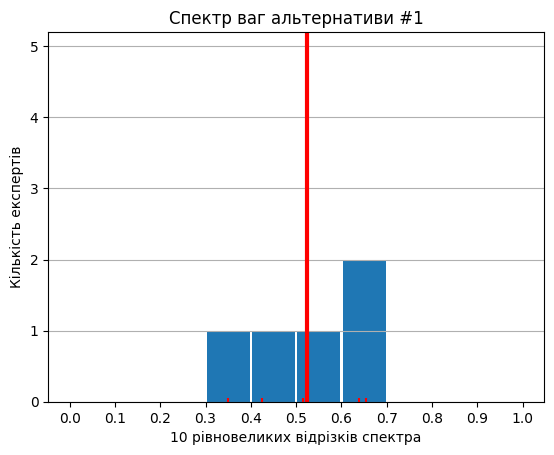

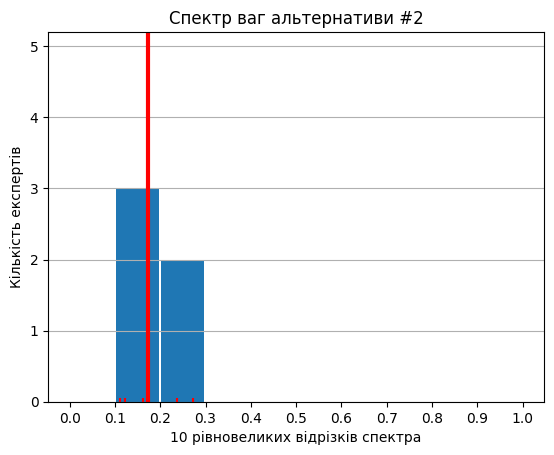

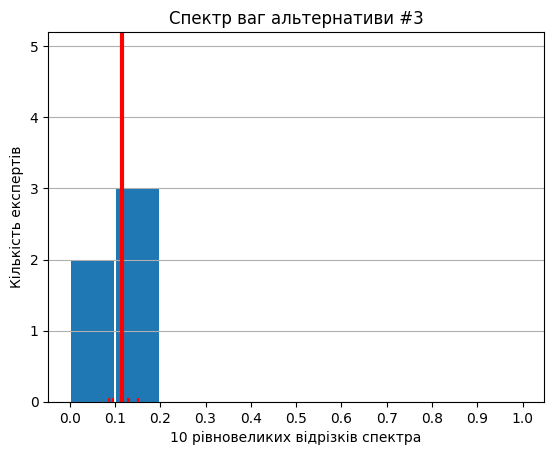

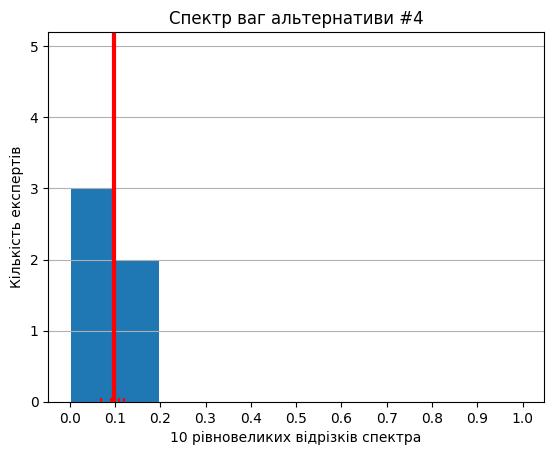

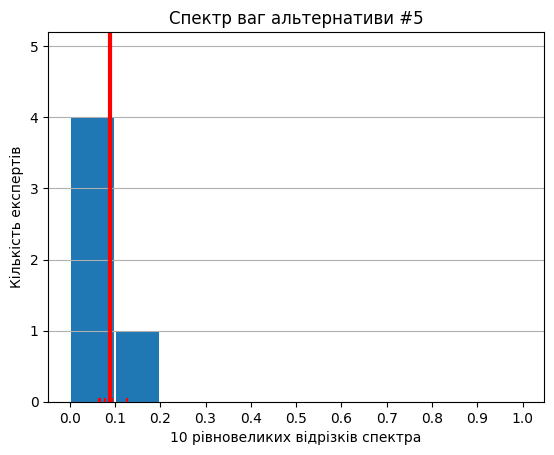

In [70]:
spectrum = []

for alternative in range(n):
    spectrum.append(plt.hist([eigenvectors[expert][alternative] for expert in range(m)], rwidth=0.95, range=(0,1), bins=10))
    plt.xticks(np.arange(0, 1+0.1, step=0.1))
    plt.yticks(np.arange(0, m+1, step=1))
    plt.ylim(0,m+0.2)
    plt.grid(axis="y")
    plt.title(f"Спектр ваг альтернативи #{alternative+1}")
    plt.xlabel("10 рівновеликих відрізків спектра")
    plt.ylabel("Кількість експертів")
    plt.scatter([eigenvectors[expert][alternative] for expert in range(m)], np.zeros(m), marker="|", color="red")
    plt.plot([merged_eigenvector[alternative], merged_eigenvector[alternative]], [0, m+1], linewidth=3, color="red")
    plt.show()

### 6. Обчисленння групової узгодженості (спектрального коефіцієнта Double Entropy)

In [71]:
def calculate_A(k):
    if k == 1:
        return 1
    else:
        return (
            (1 + int((n-1)/(k-1))*(k-1) - n) * np.log((int((n-1)/(k-1)) + 1)/(int((n-1)/(k-1)) + n - 1)) * ((int((n-1)/(k-1)) + 1)/(int((n-1)/(k-1)) + n - 1))
        ) + (
            ((n - 1 - int((n-1)/(k-1))*(k-1)) - k) * np.log(int((n-1)/(k-1))/(int((n-1)/(k-1)) + n - 1)) * (int((n-1)/(k-1))/(int((n-1)/(k-1)) + n - 1))
        )

In [72]:
def calculate_B(k, d):
    if k == 1:
        return 0
    elif k == n:
        return np.log(n)
    else:
        return ((k-1)/d) * np.log(d) - ((d-k+1)/d) * np.log((d-k+1)/d)

In [73]:
def calculate_C(n, m):
    if m < n:
        return np.log(m)
    else:
        return (
            (int(m/n) + 1) * np.log((int(m/n) + 1)/m) * ((n/m) * int(m/n) - 1)
        ) + (
            int(m/n) * np.log(int(m/n)/m) * (1 - (n/m)*(int(m/n) + 1))
        )

In [74]:
def calculate_DE(n, spectrum):
    DE = np.zeros(n)

    for alternative in range(n):
        d, q = [], []
        nonzero_indeces = np.nonzero(np.array(spectrum[alternative][0]))[0]
        k = len(nonzero_indeces)

        for i in range(k):
            if i == k-1:
                d.append(n if k == 1 else (n - 1) + (nonzero_indeces[0] - nonzero_indeces[i]) + int((n-1)/(k-1)))
            else:
                d.append(nonzero_indeces[i+1] - nonzero_indeces[i])
            q.append(spectrum[alternative][0][nonzero_indeces[i]]/np.sum(spectrum[alternative][0]))

        p = [d[i]/np.sum(d) for i in range(len(d))]

        Hp = -np.sum([p[i]*np.log(p[i]) for i in range(len(p))])
        Hq = -np.sum([q[i]*np.log(q[i]) for i in range(len(q))])

        A = calculate_A(k)
        B = calculate_B(k,np.sum(d))
        C = calculate_C(n,m)

        Hp = 1 if k == n else (Hp - B)/(A - B)
        Hq = Hq/C

        DE[alternative] = 1 - (Hp+Hq)/2

    return DE

In [75]:
DE = calculate_DE(n, spectrum)

print(f"Групова узгодженість експертів (коефіцієнт DE): {DE}")

Групова узгодженість експертів (коефіцієнт DE): [0.08613531 0.79091717 0.79091717 0.79091717 0.84454125]


In [76]:
the_least_consistent_alternative_index = np.argmin(DE)

spectrum_distances = [abs(eigenvectors[expert][the_least_consistent_alternative_index] - merged_eigenvector[the_least_consistent_alternative_index]) for expert in range(m)]

the_worst_expert = np.argmax(spectrum_distances)

print(f"Матриця експерта №{the_worst_expert+1}: \n{E[the_worst_expert]}")

Матриця експерта №5: 
[[1.         2.         4.         2.         1.        ]
 [0.5        1.         3.         3.         2.        ]
 [0.25       0.33333333 1.         3.         3.        ]
 [0.5        0.33333333 0.33333333 1.         2.        ]
 [1.         0.5        0.33333333 0.5        1.        ]]


### 7. Побудова ідеальної транзитивної матриці

In [77]:
T = np.zeros((n,n))

for i in range(len(T)):
    for j in range(len(T[0])):
        T[i][j] = merged_eigenvector[i]/merged_eigenvector[j]

print(f"Ідеальна транзитивна матриця: \n{T}")

print(f"\nМатриця експерта №{the_worst_expert+1}: \n{E[the_worst_expert]}")

Ідеальна транзитивна матриця: 
[[1.         3.01773078 4.53567332 5.3243779  5.90724018]
 [0.33137482 1.         1.50300794 1.76436478 1.95751066]
 [0.22047443 0.66533248 1.         1.17388919 1.30239542]
 [0.18781537 0.56677622 0.85186916 1.         1.10947049]
 [0.16928379 0.5108529  0.76781597 0.90133086 1.        ]]

Матриця експерта №5: 
[[1.         2.         4.         2.         1.        ]
 [0.5        1.         3.         3.         2.        ]
 [0.25       0.33333333 1.         3.         3.        ]
 [0.5        0.33333333 0.33333333 1.         2.        ]
 [1.         0.5        0.33333333 0.5        1.        ]]


In [78]:
matrix_distance = abs(T-E[the_worst_expert])
print(f"Матриця різниці відстаней: \n{matrix_distance}")

the_worst_element = np.argmax(matrix_distance) 
print(f"\nНайбільш віддалений елемент матриці експерта: e[{the_worst_element // n}][{the_worst_element % n}]")

Матриця різниці відстаней: 
[[0.         1.01773078 0.53567332 3.3243779  4.90724018]
 [0.16862518 0.         1.49699206 1.23563522 0.04248934]
 [0.02952557 0.33199915 0.         1.82611081 1.69760458]
 [0.31218463 0.23344289 0.51853583 0.         0.89052951]
 [0.83071621 0.0108529  0.43448263 0.40133086 0.        ]]

Найбільш віддалений елемент матриці експерта: e[0][4]


In [79]:
print(f"Вигляд матриці експерта №{the_worst_expert+1}: \n{E[the_worst_expert]}")

E[the_worst_expert][the_worst_element // n][the_worst_element % n] = round(T[the_worst_element // n][the_worst_element % n])

print(f"\nВідкорегований вигляд матриці експерта №{the_worst_expert+1} відповідно до ідеальної матриці: \n{E[the_worst_expert]}")

Вигляд матриці експерта №5: 
[[1.         2.         4.         2.         1.        ]
 [0.5        1.         3.         3.         2.        ]
 [0.25       0.33333333 1.         3.         3.        ]
 [0.5        0.33333333 0.33333333 1.         2.        ]
 [1.         0.5        0.33333333 0.5        1.        ]]

Відкорегований вигляд матриці експерта №5 відповідно до ідеальної матриці: 
[[1.         2.         4.         2.         6.        ]
 [0.5        1.         3.         3.         2.        ]
 [0.25       0.33333333 1.         3.         3.        ]
 [0.5        0.33333333 0.33333333 1.         2.        ]
 [1.         0.5        0.33333333 0.5        1.        ]]


In [80]:
eigenvalues_max = calculate_eigenvalues(E)

eigenvectors = np.zeros((m,n))
for expert in range(m):
    eigenvectors[expert] = calculate_eigenvector(copy.deepcopy(E[expert]))

merged_eigenvector = calculate_merged_eigenvector(eigenvectors, w, n)

spectrum = []
for alternative in range(n):
    spectrum.append(np.histogram([eigenvectors[expert][alternative] for expert in range(m)], range=(0,1), bins=10))

DE = calculate_DE(n, spectrum)

print(f"Групова узгодженість експертів (коефіцієнт DE): {DE}")

Групова узгодженість експертів (коефіцієнт DE): [0.08613531 0.79091717 0.79091717 0.79091717 1.        ]


### 8. Ітераційна процедура оптимізації групової узгодженості (DE) 

In [ ]:
k = 1
while (DE > 0.75).all() != True:
    # процедура оптимізації
    the_least_consistent_alternative_index = np.argmin(DE)

    spectrum_distances = [abs(eigenvectors[expert][the_least_consistent_alternative_index] - merged_eigenvector[the_least_consistent_alternative_index]) for expert in range(m)]

    the_worst_expert = np.argmax(spectrum_distances)

    T = np.zeros((n,n))

    for i in range(len(T)):
        for j in range(len(T[0])):
            T[i][j] = merged_eigenvector[i]/merged_eigenvector[j]

    matrix_distance = abs(T-E[the_worst_expert])
    the_worst_element = np.argmax(matrix_distance) 

    E[the_worst_expert][the_worst_element // n][the_worst_element % n] = round(T[the_worst_element // n][the_worst_element % n])
    
    # процедура переобчислення
    eigenvalues_max = calculate_eigenvalues(E)

    eigenvectors = np.zeros((m,n))
    for expert in range(m):
        eigenvectors[expert] = calculate_eigenvector(copy.deepcopy(E[expert]))

    merged_eigenvector = calculate_merged_eigenvector(eigenvectors, w, n)

    spectrum = []
    for alternative in range(n):
        spectrum.append(np.histogram([eigenvectors[expert][alternative] for expert in range(m)], range=(0,1), bins=10))

    DE = calculate_DE(n, spectrum)

    print(f"Ітерація №{k} Групова узгодженість експертів (коефіцієнт DE): {DE}")
    k += 1